In [1]:
import pandas as pd  # convention to import and use pandas like this

df = pd.read_csv("datasets/avocado.csv")  # df stands for dataframe. Also a common convention to call this df
df = df.copy()[df['type']=='organic']

In [2]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9126,0,2015-12-27,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.0,organic,2015,Albany
9127,1,2015-12-20,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.0,organic,2015,Albany
9128,2,2015-12-13,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.0,organic,2015,Albany
9129,3,2015-12-06,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.0,organic,2015,Albany
9130,4,2015-11-29,1.94,831.69,0.00,94.73,0.0,736.96,736.96,0.00,0.0,organic,2015,Albany


In [3]:
df.tail(6)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
df['AveragePrice'].head()

9126    1.83
9127    1.89
9128    1.85
9129    1.84
9130    1.94
Name: AveragePrice, dtype: float64

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
albany_df = df.copy()[df['region']=="Albany"]

In [7]:
albany_df.index

Int64Index([ 9126,  9127,  9128,  9129,  9130,  9131,  9132,  9133,  9134,
             9135,
            ...
            17603, 17604, 17605, 17606, 17607, 17608, 17609, 17610, 17611,
            17612],
           dtype='int64', length=169)

In [8]:
albany_df.set_index("Date", inplace=True)

In [9]:
albany_df['AveragePrice'].plot()

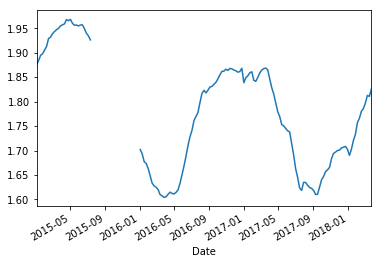

In [10]:
albany_df["AveragePrice"].rolling(25).mean().plot()

In [11]:
albany_df.sort_index(inplace=True)

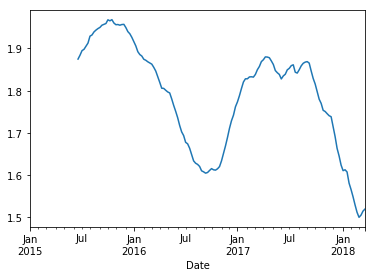

In [12]:
albany_df["AveragePrice"].rolling(25).mean().plot()

In [13]:
albany_df["price25ma"] = albany_df["AveragePrice"].rolling(25).mean()

In [14]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [15]:
graph_df = pd.DataFrame()

for region in df['region'].unique()[:16]:
    print(region)
    region_df = df.copy()[df['region']==region]
    region_df.set_index('Date', inplace=True)
    region_df.sort_index(inplace=True)
    region_df[f"{region}_price25ma"] = region_df["AveragePrice"].rolling(25).mean()

    if graph_df.empty:
        graph_df = region_df[[f"{region}_price25ma"]]  # note the double square brackets!
    else:
        graph_df = graph_df.join(region_df[f"{region}_price25ma"])

Albany
Atlanta
BaltimoreWashington
Boise
Boston
BuffaloRochester
California
Charlotte
Chicago
CincinnatiDayton
Columbus
DallasFtWorth
Denver
Detroit
GrandRapids
GreatLakes


In [16]:
graph_df.tail()

,Albany_price25ma,Atlanta_price25ma,BaltimoreWashington_price25ma,Boise_price25ma,Boston_price25ma,BuffaloRochester_price25ma,California_price25ma,Charlotte_price25ma,Chicago_price25ma,CincinnatiDayton_price25ma,Columbus_price25ma,DallasFtWorth_price25ma,Denver_price25ma,Detroit_price25ma,GrandRapids_price25ma,GreatLakes_price25ma
Date,,,,,,,,,,,,,,,,
2018-02-25,1.5112,1.8660,1.5836,2.0512,1.7636,1.2912,1.9128,2.0548,1.8160,1.7752,1.6064,1.5708,1.7084,1.4980,1.3388,1.5656
2018-03-04,1.4992,1.8288,1.5772,2.0176,1.7708,1.2744,1.8876,2.0180,1.8024,1.7564,1.5804,1.5536,1.6880,1.4692,1.3232,1.5460
2018-03-11,1.5044,1.7844,1.5732,1.9836,1.7824,1.2652,1.8636,1.9764,1.7836,1.7216,1.5496,1.5340,1.6708,1.4444,1.3200,1.5248
2018-03-18,1.5140,1.7412,1.5684,1.9520,1.7932,1.2560,1.8516,1.9444,1.7732,1.6860,1.5088,1.5196,1.6700,1.4092,1.3148,1.5012
2018-03-25,1.5188,1.6936,1.5568,1.9128,1.7984,1.2416,1.8364,1.9024,1.7672,1.6720,1.4848,1.5100,1.6568,1.3964,1.3108,1.4912


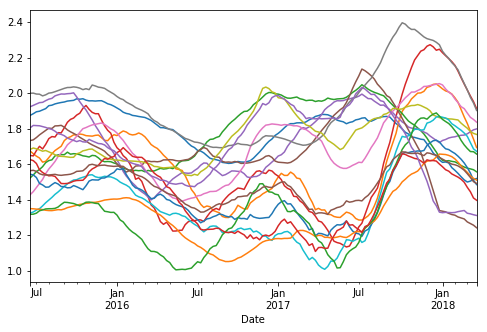

In [17]:
graph_df.dropna().plot(figsize=(8,5), legend=False)